# Analyze A/B Test Results 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#Conclusion)



<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, We will be working to understand the results of an A/B test run by an e-commerce website. Our goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

`pandas` package offers Data Manipulation and analysis using Dataframes and Series.</br>
`numpy`  package offers Data Manipulation, speed reliable mathematical functions.</br>
`random` package offers useful randomness functions including configuring the seed.</br>
`matplotlib.pyplot` module offers Data Visualization to draw useful and insightful charts. 

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers 
random.seed(42)

Now We read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

`read_csv()` to read a csv file and transform into a Dataframe.</br>
`.head()` method to display the top 5 rows of our data.

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

`shape` attribute produces the tuple`(nrows,ncolumns)` then we specify the rows by index 0

In [3]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

We specify the `['user_id']` column first then call `.nunique()` method to know how many unique users we have.

In [4]:
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

We could take the `mean` of the `converted` column because it's only one when it's converted.</br>
instead of getting the count of converted and dividing by the length of all of them</br>
We multiplied by 100 to get the percentage.

In [5]:
# df[df['converted']==1].shape[0]/df.shape[0]*100
df['converted'].mean() * 100

11.96591935560551

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

>**The number of times the 'new_page' and 'treatment' don't match means the number of times new_page and treatment don't match plus the number old_page and control don't match.**

`.query()` method to select the rows where `group = "treatment" and landing_page = "old_page" ` and adds to the `landing_page=="new_page" and group=="control"`.<br>
`shape` attribute produces the tuple`(nrows,ncolumns)` then we specify the rows by index 0.

In [6]:
df.query('(landing_page=="old_page" and group=="treatment") or (landing_page=="new_page" and group=="control")').shape[0]

3893

**f.** Do any of the rows have missing values?

`.info()` method to find out how many non null values in each column.<br>
As we can see they are all the same so no missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


<hr style="width:50%">

In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

`.query()` method to select the rows where `group == "treatment" and landing_page == "new_page" `**or** `group == "treatment" and landing_page == "new_page" `<br>
`.head()` method to display the top 5 rows of our data.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2=df.query('(group == "control" and landing_page == "old_page") or (group == "treatment" and landing_page == "new_page")')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Checking if we cleared every false valued row using another method.

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

<hr style="width:50%">

**a.** How many unique **user_id**s are in **df2**?

We specify the `['user_id']` column first then call `.nunique()` method to know how many unique users we have.

In [10]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

To find the duplicated id we can call `.mode()` method to find what occurred more than once in the `user_id` column 

In [11]:
duplicated_id = df2['user_id'].mode()
duplicated_id

0    773192
dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

`.query()` method to extract the rows with duplicated id.<br>
Using a fstring to use the `duplicated_id` directly, using the attribute `values` to access the value within the Series. 

In [12]:
df2.query(f'user_id == {duplicated_id.values}')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

`.drop_duplicated()` method to drop the duplicated values within the column specified `'user_id'`.

In [13]:
# Remove one of the rows with a duplicate user_id..
df2=df2.drop_duplicates('user_id')

# Check again if the row with a duplicate user_id is deleted or not
df2.query(f'user_id == {duplicated_id.values}')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


<hr style="width:50%">

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

calling `.mean()` method on the `converted` column to find out the probability required.



In [14]:
df2['converted'].mean()

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

First we specify the `control` group then call `.mean()` on it's `converted` column.

In [15]:
control_mean=df2[df2['group']=='control']['converted'].mean()
control_mean

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

First we specify the `treatment` group then call `.mean()` on it's `converted` column.

In [16]:
treatment_mean=df2[df2['group']=='treatment']['converted'].mean()
treatment_mean

0.11880806551510564

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff=treatment_mean-control_mean
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?<br>
We divide the nRows of the `new_page` over the whole rows of `df2`

In [18]:
df2[df2['landing_page']=='new_page'].shape[0]/df2.shape[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

From the surface it feels like it doesn't lead to new conversions but we have to find out p value first to tell if it's significant or not.

<hr>

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  




For now, consider you need to make the decision just based on all the data provided.  

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>Based on all the data and `obs_diff` < 0 that the old page is better but we need more investigation to make sure.<br>
>**$H_0$** is that the old page is better. (**$p_{new}$** - **$p_{old}$** <= 0) <br>
>**$H_1$** is that new page proves to be definitely better. (**$p_{new}$** - **$p_{old}$** > 0)<br>

<hr style="width:50%">

### Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
$p_{new}$ = $p_{old}$ = $p_{population}$


In this section, We will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

We assume that $p_{new}$ = $p_{old}$ = $p_{population}$ so `p_new` and `p_old` are the same as the mean of the `converted` column of `df2`.

In [19]:
p_new=df2['converted'].mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
p_old=df2['converted'].mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
We find out the number of them by querying the `new_page` and getting the nRows from the `shape` attribute

In [21]:
n_new=df2.query('landing_page == "new_page"').shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

We find out the number of them by querying the `old_page` and getting the nRows from the `shape` attribute

In [22]:
n_old=df2.query('landing_page == "old_page"').shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  

We generate a random sample from our treatment group with replaced data.<br>
`choice` function to generate an array with the size of `n_new` and the probability of 1 is as the original group `p_new`<br>
We could also use `df2.sample(n_new,replace=True)['converted']`



In [23]:
new_page_converted=np.random.choice([1,0],size=n_new,p=[p_new,1-p_new])
new_page_converted.mean()

0.12063863464317666

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> 

We generate a random sample from our control group with replaced data.<br>
`choice` function to generate an array with the size of `n_old` and the probability of 1 is as the original group `p_old`<br>
We could also use `df2.sample(n_old,replace=True)['converted']`


In [24]:
old_page_converted=np.random.choice([1,0],size=n_old,p=[p_old,1-p_old])
old_page_converted.mean()

0.1192987045169817

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples.<br>

We subtract the two means of our two samples and it's as we hypothesized that the difference equals zero<br>
>It will never equals a perfect zero but it tends to it

In [25]:
dif=new_page_converted.mean()-old_page_converted.mean()
dif

0.0013399301261949603


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

We simulate the sampling 10,000 times using `binomial()` giving it the number we want and the probability for each new & old then storing the difference in `p_diffs` array using the same logic we did a moment ago.

In [26]:
# Sampling distribution 

new_con_sim = np.random.binomial(n_new, p_new, 10000)/n_new
old_con_sim = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_con_sim - old_con_sim

p_diffs.mean()

-4.226362740351693e-06

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br>

We plot the histogram with the hist function with `p_diffs` as parameters.<br>
We draw a vertical line to indicate what our actual difference observed in our original data `df2` using the `plt.axvline()` function.<br>
We specify the `xlabel` and `ylabel` and the `legend` to show more info about the graph

The histogram is as We expected because it's symmetric about the 0. 


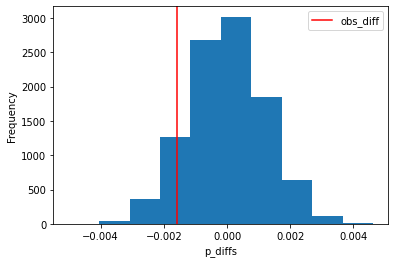

In [27]:
plt.hist(p_diffs)
plt.axvline(obs_diff,color='r',label='obs_diff')
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.legend()
plt.show();

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

It's 90.26% of the `p_diffs` that are greater than the `obs_diff`

In [28]:
(p_diffs>obs_diff).mean()

0.903

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>90.3% is called a P-Value it's a way to measure The level of statistical significance.<br>
>It's insignificant as it's higher than .05 and we fail to reject the null hypothesis.
>

<hr style="width:50%">

**l. Using Built-in Methods for Hypothesis Testing**<br>

- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page

In [29]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page == "old_page"')['converted'].sum()

# number of conversions with the new_page
convert_new =df2.query('landing_page == "new_page"')['converted'].sum()

# number of individuals who were shown the old_page
n_old = df2.query('landing_page == "old_page"').shape[0]

# number of individuals who received new_page
n_new = df2.query('landing_page == "new_page"').shape[0]

convert_old,convert_new,n_old,n_new

(17489, 17264, 145274, 145310)

Calculate the p_value using the `proportions_ztest` function providing the numbers of conversions and individuals from the old & new page<br>
It's a right-tailed as we defined $H_1$ as $(p_{new} > p_{old})$ so we chose `larger` in the alternative. 

In [30]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score,p_value)


-1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages? 
>P-Value is 0.905 and it's higher than 0.05 .<br>
it means that we are 95% confident that the new_page has **not** better conversation rate than the old_page.<br>
It's roughly the same as we calculated before.

<hr>

<a id='regression'></a>
### Part III - A regression approach

In this final part, we will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

> it's a logistic regression as it predicts a whether the value is 1 or 0 (not continuous quantitative values)

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

We make a `copy` of `df2` then we create the `intercept` column with values = 1 <br> 
We make a boolean mask of the group where the `treatment` equals True then use `apply` to apply whither it's one or not based on treatment.<br>

In [31]:
df_model=df2.copy()
df_model['intercept']=1
df_model['ab_page']= (df_model['group']=='treatment').apply(lambda x : 1 if x else 0)
df_model.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** We Use **statsmodels** to instantiate our regression model on the two columns you created in part (b). 

We make the model using `Logit` cause it's logistic regression then calling `fit` to predict whether or not an individual converts.

In [32]:
model = sm.Logit(df_model['converted'],df_model[['ab_page','intercept']])
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

Calling `summary` to find out the P-Value of the ab_page column

In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Nov 2021   Pseudo R-squ.:               8.077e-06
Time:                        17:18:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  
>P-Value is 0.19 > 0.05. Thus,It's not statistically significant.

>It's different from part II cause it was said that it's **one-tailed** test but here it assumes that it's **two-tailed** cause the page could affect with positive or negative so it considers both cases that affect the conversion rate.



f. Now, you are considering other things that might influence whether or not an individual converts. Discuss why it is a good idea to consider other factors to add into your regression model. Are there any disadvantages to adding additional terms into your regression model?

>Yes we should consider other factors to help us but watch out if they get too large the more it's complex.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. We will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows.then call the resulting dataframe `df_merged`. 

2. Does it appear that country had an impact on conversion?  To answer this question, We consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Creating dummy variables for these country columns. 

Read the countries using the `read_csv` function and calling `head` to show the first 5 rows

In [34]:
# Read the countries.csv
countries=pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


We merge our tables with `merge` providing the `countries` DataFrame on the `user_id` column with `left` to the appropriate country for each use on the left DataFrame.

In [35]:
# merge with the df_model dataframe
df_merged=df_model.merge(countries,on='user_id',how='left')
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


We create our `['CA','UK','US']` columns using `get_dummies` to generate wither each column a 1 or 0 then appending to our DataFrame.

In [36]:
# Create the necessary dummy variables
df_merged[['CA','UK','US']]=pd.get_dummies(df_merged['country'])
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


We make the model using `Logit` cause it's logistic regression giving it the converted column as the column we want to predict and our columns for the model to be based on then calling `fit` to predict whether or not an individual converts.

In [37]:
model = sm.Logit(df_merged['converted'],df_merged[['ab_page','UK','US','intercept']])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 22 Nov 2021   Pseudo R-squ.:               2.323e-05
Time:                        17:33:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
==============================================================================
"""

The countries doesn't affect the conversion rate ; P-values for {UK,US} are above 0.05.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 



Since we have three countries, we need to include interaction of 2/3 countries.<br>
So we make the `US_ab_page` & `UK_ab_page` columns by multiplying the country by if it's new_page or not.

In [38]:
df_merged['US_ab_page'] = df_merged['US'] *df_merged['ab_page']
df_merged['UK_ab_page'] = df_merged['UK'] *df_merged['ab_page']

df_merged.head()
                    

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,US_ab_page,UK_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0


In [40]:
# using Logit to make our model giving it the predicted and independent columns respectively.
model = sm.Logit(df_merged['converted'],df_merged[['ab_page','UK','US','UK_ab_page','US_ab_page','intercept']])
result=model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-11-22 17:35 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
==================================================================

"""

### Summary
P_Value for all of them is higher than 0.05 so it's not statistically significant.

The countries relationship to ab_page don't affect the conversion rate .

<hr>


<h3 id ="Conclusion">Conclusions</h3>

Countries(as an overall factor) don't have an impact on the conversation rate cause P-value for all of them is above .05.

The old page is better at the conversation rate  cause from our statistical research we could not reject the null which that the old page has equally or better conversation rate.

After a lot of research we found out that there isn't enough that say that the new_page conversion rate is better nor the countries from the logistic regression we modeled<br>
So after we found that our sample is very big, we shouldn't continue testing and try making some more new features.
